In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [6]:
df=pd.read_csv('D:\\BIZMETRIC INTERNSHIP\\datasets\\Automobile_data.csv')

In [8]:
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [ ]:
### 1. Know Your Data ###

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [10]:
df.describe(include='all')

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
count,61.000000,61,61,61.000000,61.000000,61,61,61.000000,61.000000,58.000000
unique,NaN,16,5,NaN,NaN,7,7,NaN,NaN,NaN
top,NaN,toyota,sedan,NaN,NaN,ohc,four,NaN,NaN,NaN
freq,NaN,7,32,NaN,NaN,46,39,NaN,NaN,NaN
mean,40.885246,NaN,NaN,98.481967,173.098361,NaN,NaN,107.852459,25.803279,15387.000000
std,25.429706,NaN,NaN,6.679234,14.021846,NaN,NaN,53.524398,8.129821,11320.259841
min,0.000000,NaN,NaN,88.400000,141.100000,NaN,NaN,48.000000,13.000000,5151.000000
25%,18.000000,NaN,NaN,94.500000,159.100000,NaN,NaN,68.000000,19.000000,6808.500000
50%,39.000000,NaN,NaN,96.300000,171.200000,NaN,NaN,100.000000,25.000000,11095.000000
75%,61.000000,NaN,NaN,101.200000,177.300000,NaN,NaN,123.000000,31.000000,18120.500000


In [11]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [ ]:
# missing values #

In [13]:
missing_count= df.isnull().sum()
val_count=df.isnull().count()
missing_percentage= round(missing_count/val_count * 100,2)
missing_df=pd.DataFrame({'count':missing_count,'percentage':missing_percentage})
print(missing_df)

                  count  percentage
index                 0        0.00
company               0        0.00
body-style            0        0.00
wheel-base            0        0.00
length                0        0.00
engine-type           0        0.00
num-of-cylinders      0        0.00
horsepower            0        0.00
average-mileage       0        0.00
price                 3        4.92


In [14]:
df['company_length'] = df['company'].apply(len)

In [15]:
df['with_price'] = np.where(df['price'].isnull(), 'Yes', 'No')

In [18]:
df=df.drop(['index','length','with_price'],axis=1)

In [33]:
num_list = [] 
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]): 
        num_list.append(column) 
    elif is_string_dtype(df[column]):
        cat_list.append(column)

print (num_list) 
print(cat_list)

['wheel-base', 'horsepower', 'average-mileage', 'price', 'company_length']
['company', 'body-style', 'engine-type', 'num-of-cylinders']


In [ ]:
# bar chart and histogram

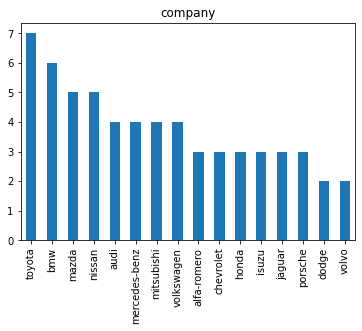

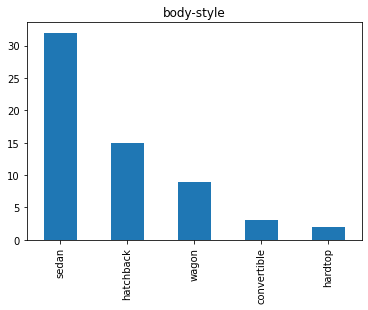

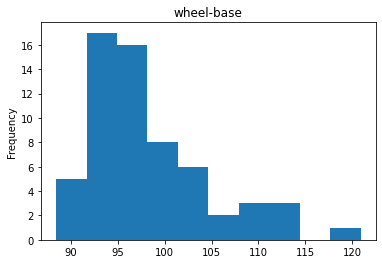

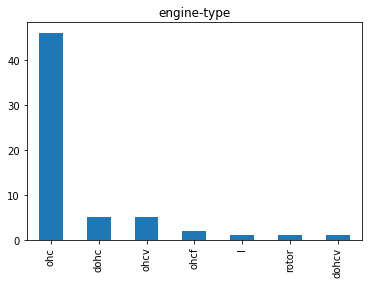

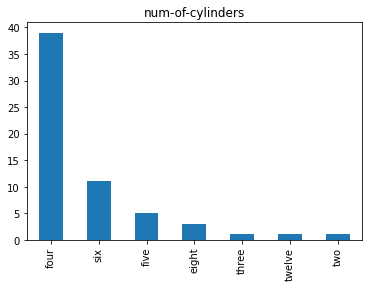

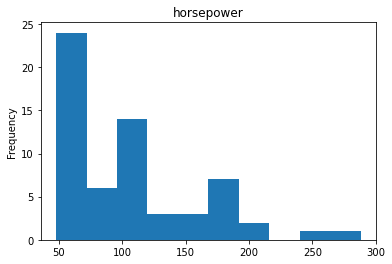

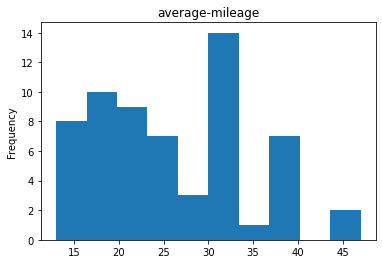

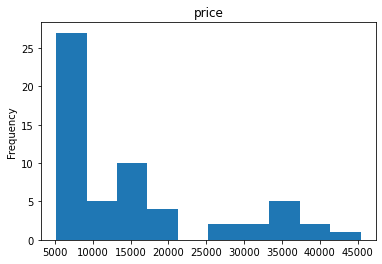

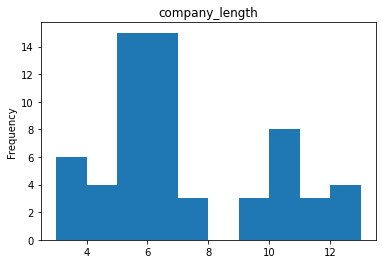

In [34]:
for column in df :
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind='hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:20].plot(kind = 'bar')

In [ ]:
# correation matrix and heatmap

<AxesSubplot:>

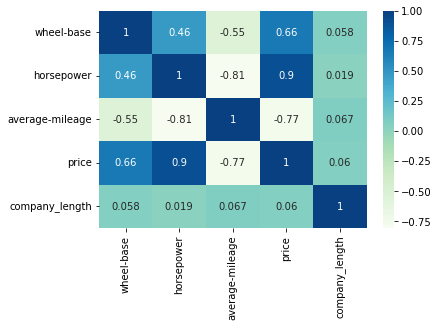

In [35]:
correlation=df.corr()
sns.heatmap(correlation,cmap="GnBu",annot=True)

In [ ]:
# pairplot

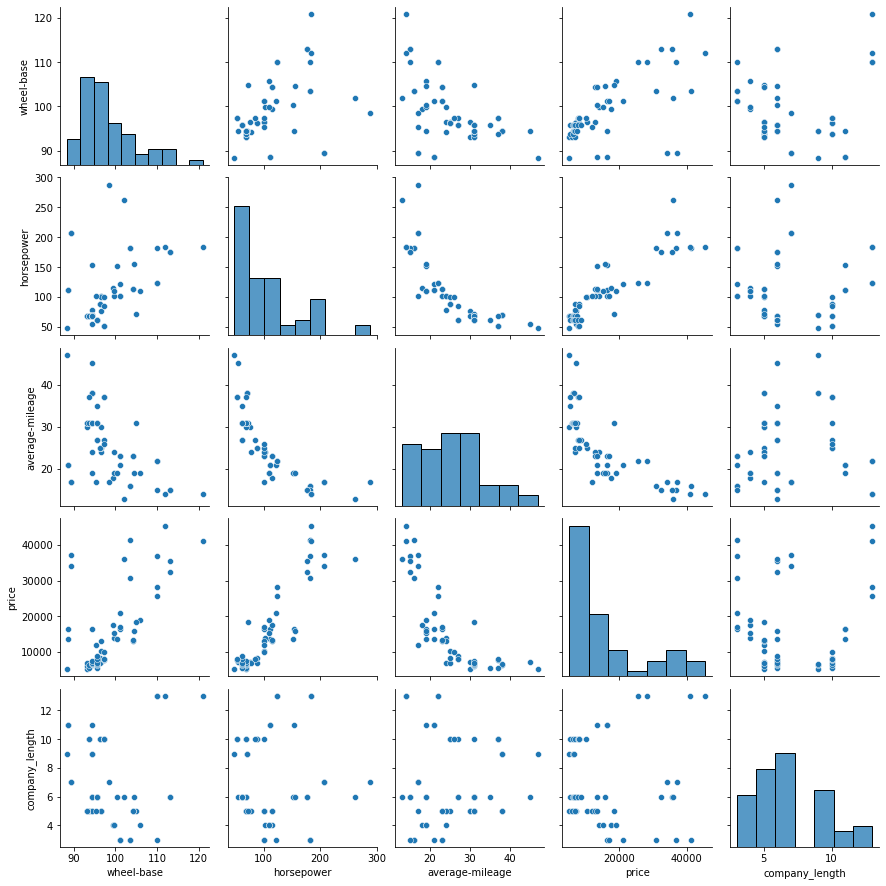

In [36]:
sns.pairplot(df,height=2.5)

In [ ]:
# grouped bar chart

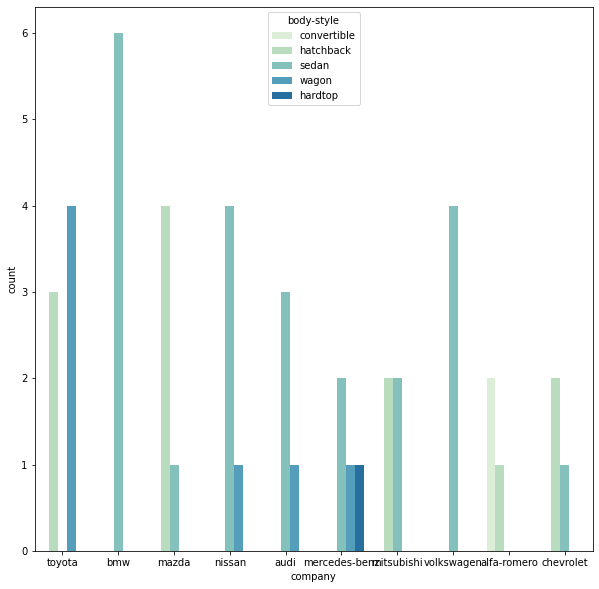

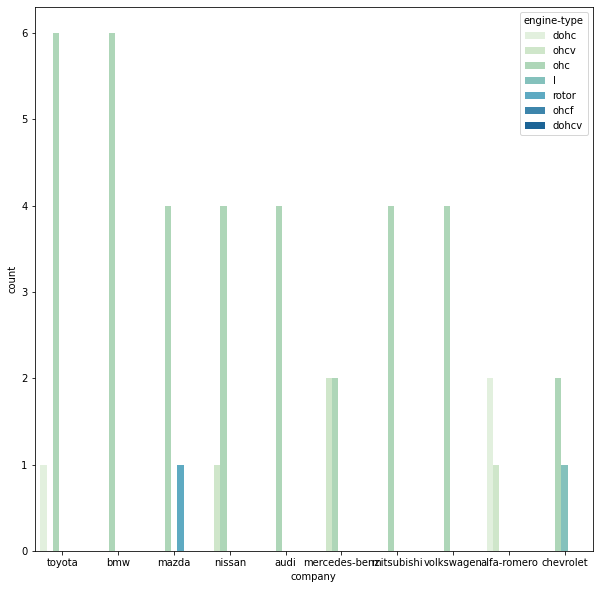

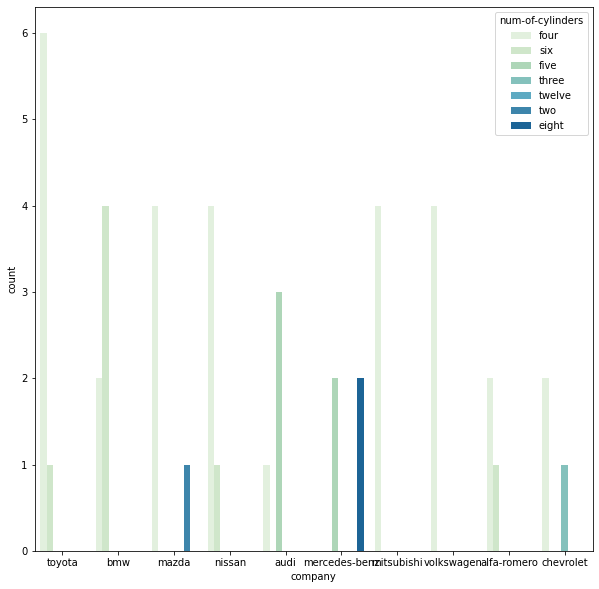

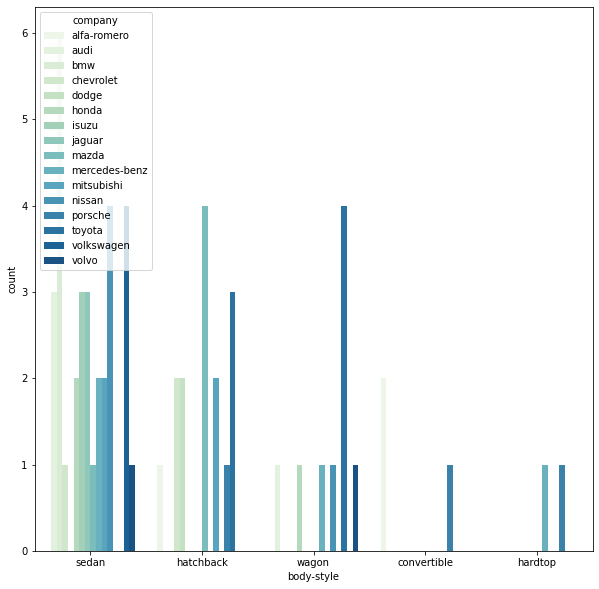

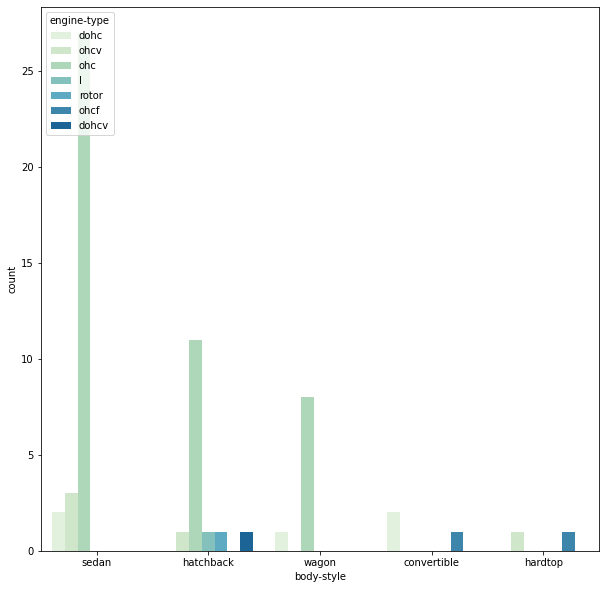

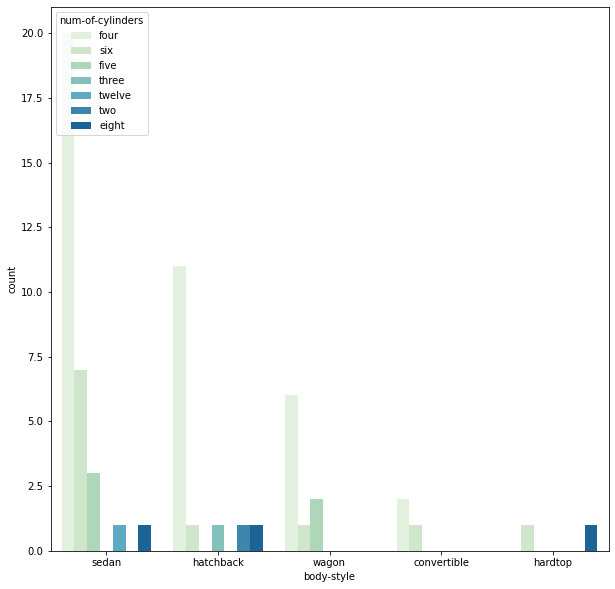

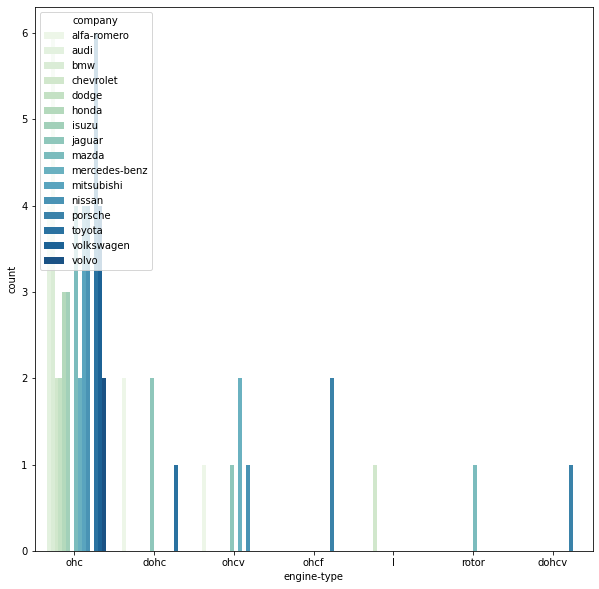

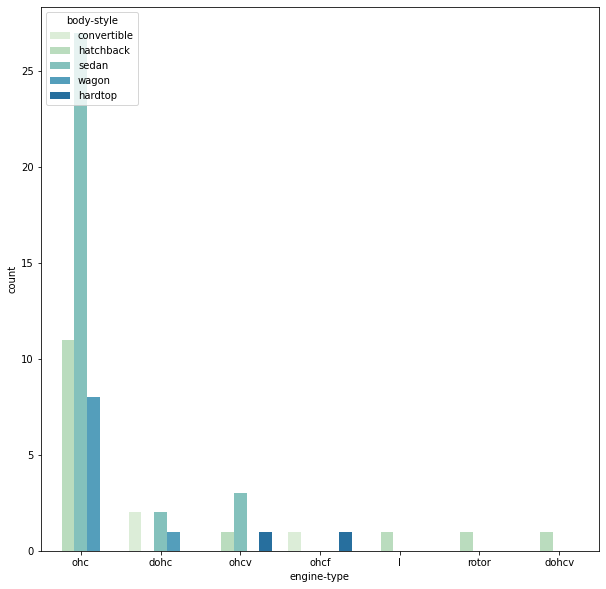

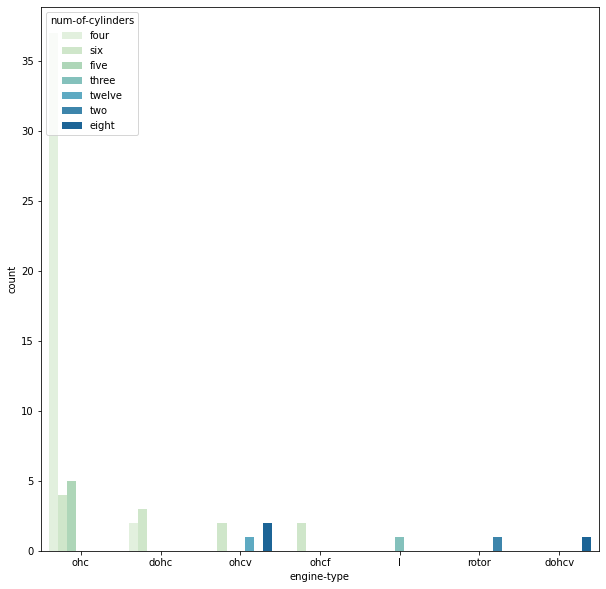

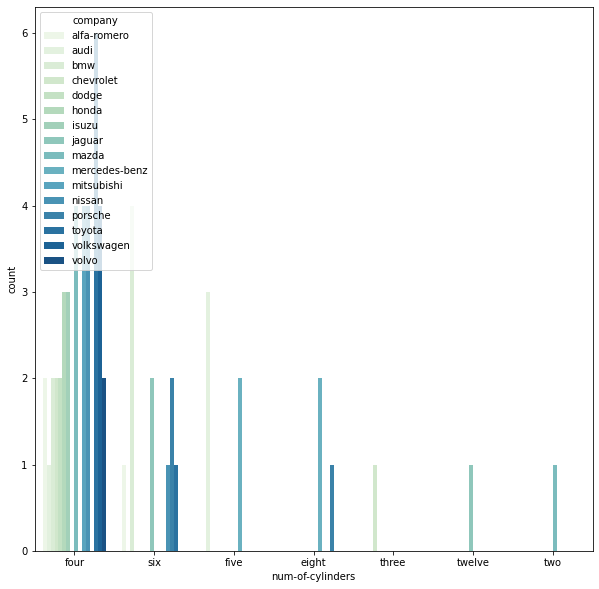

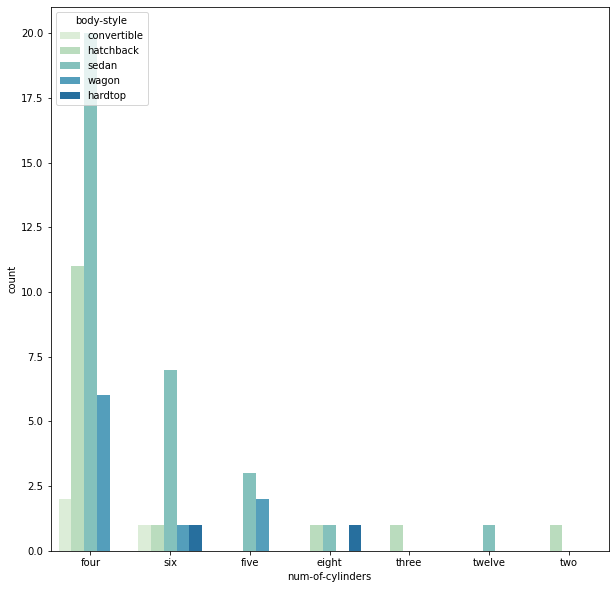

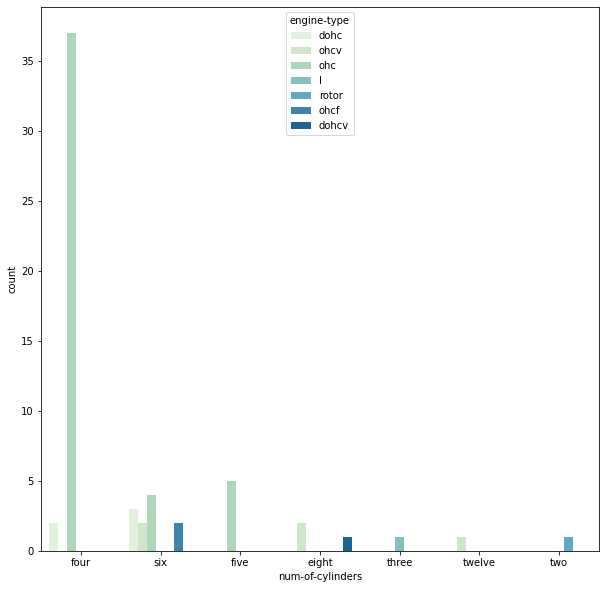

In [44]:
for i in range(0, len(cat_list)): 
    primary_cat= cat_list[i] 
    for j in range(0, len(cat_list)): 
        secondary_cat= cat_list[j]
        if secondary_cat != primary_cat: 
            plt.figure (figsize= (10,10)) 
            chart= sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat, 
                palette= 'GnBu', 
                order=df[primary_cat].value_counts().iloc[:10].index 
                )

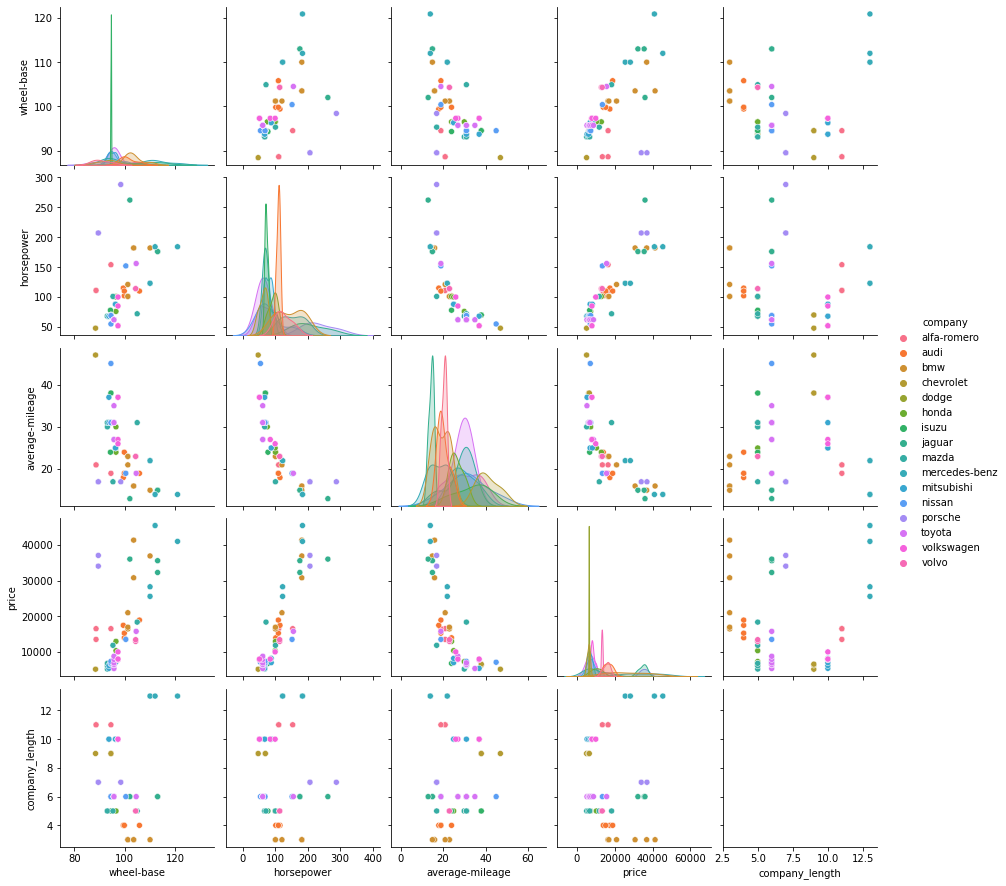

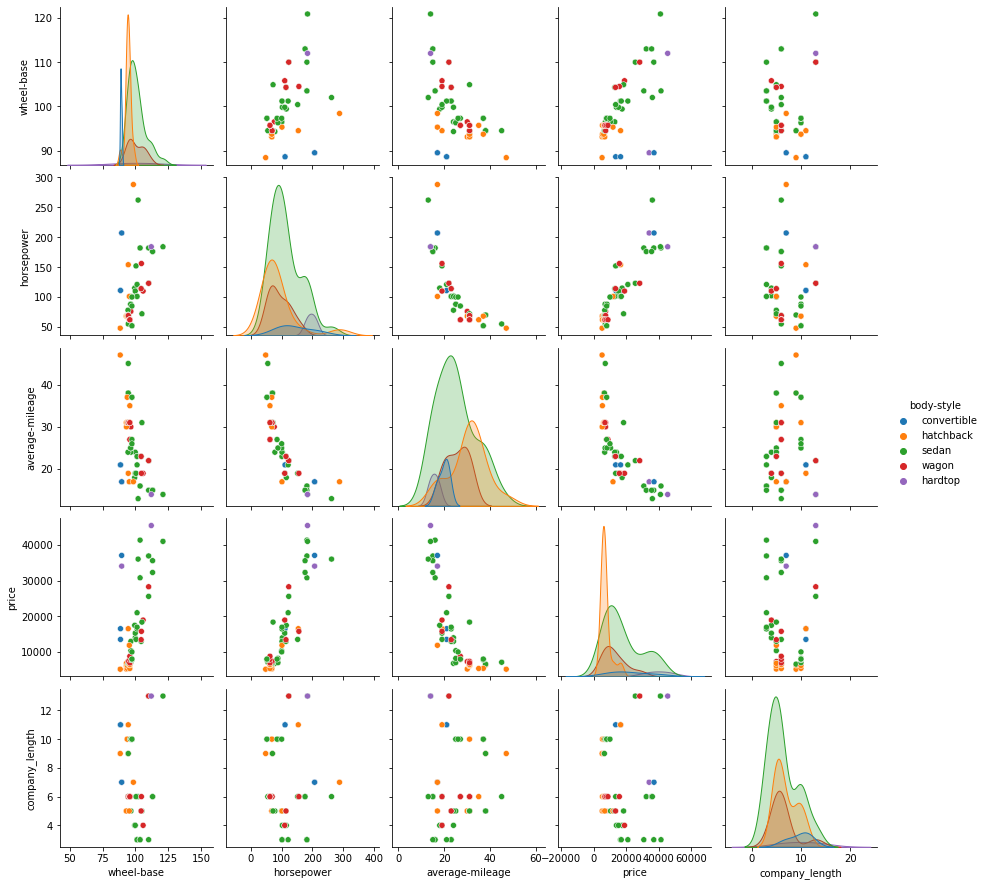

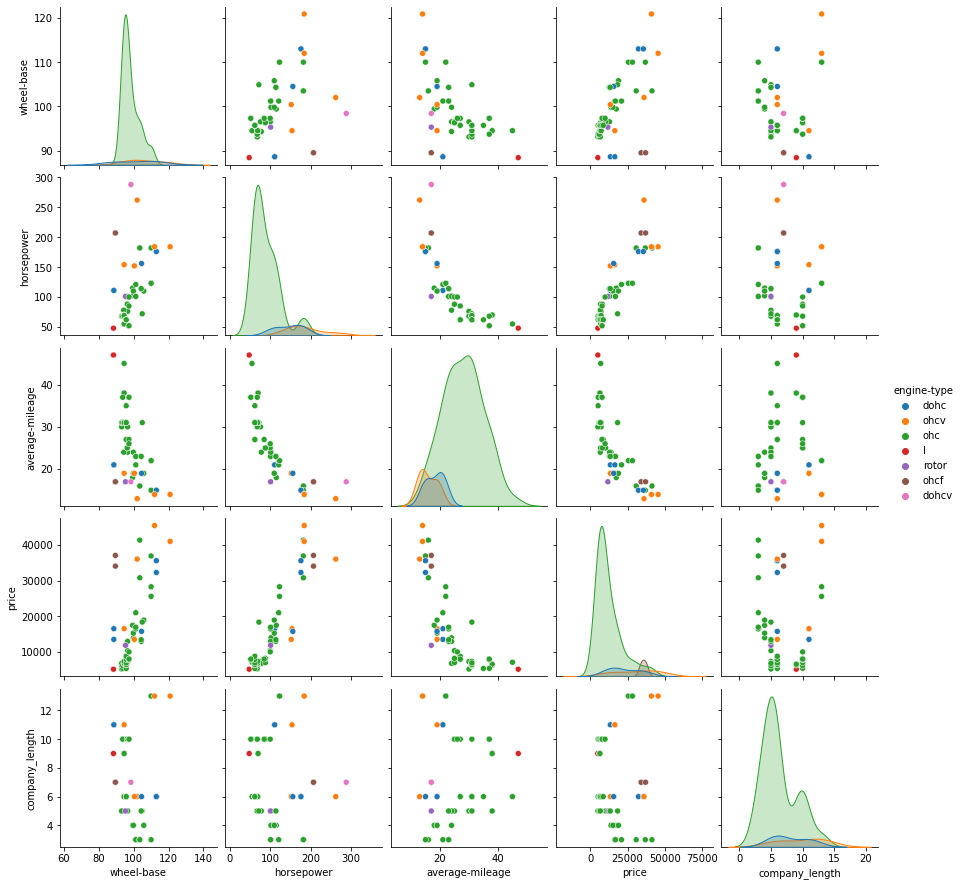

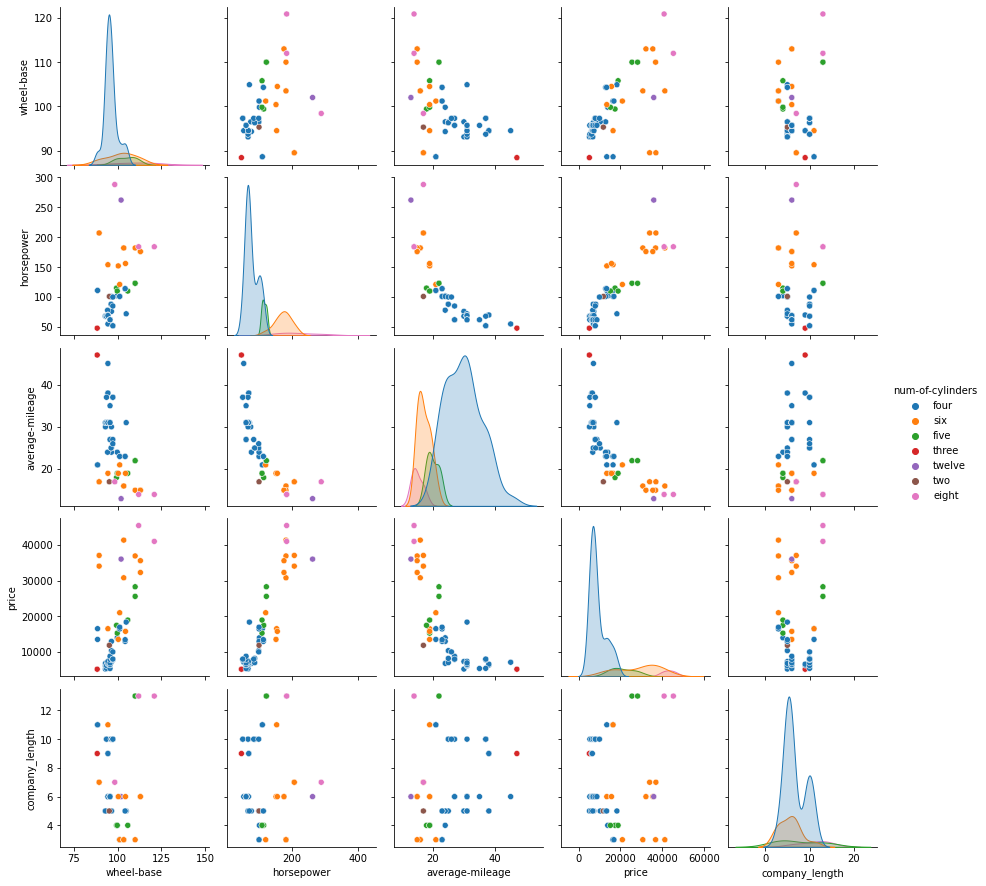

In [45]:
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)


In [ ]:
# box plot

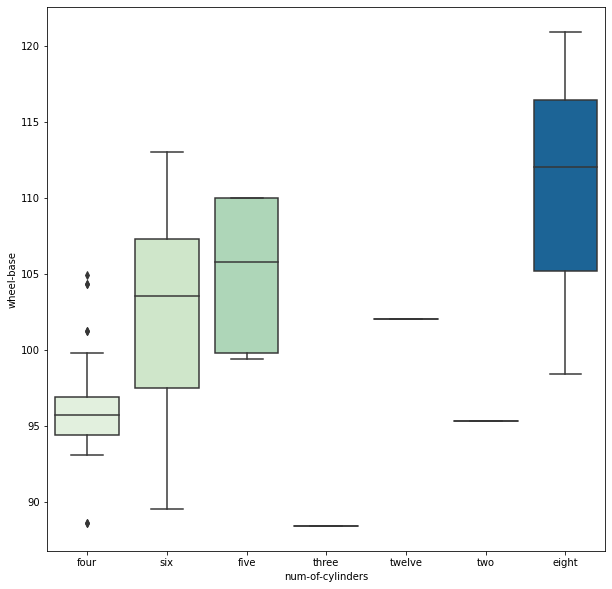

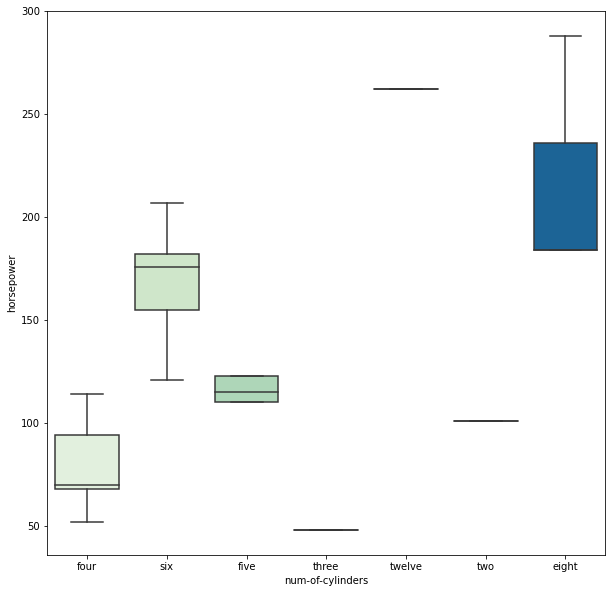

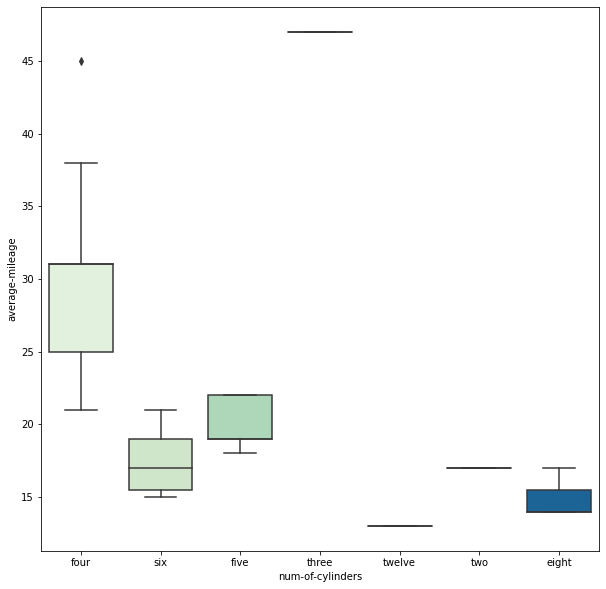

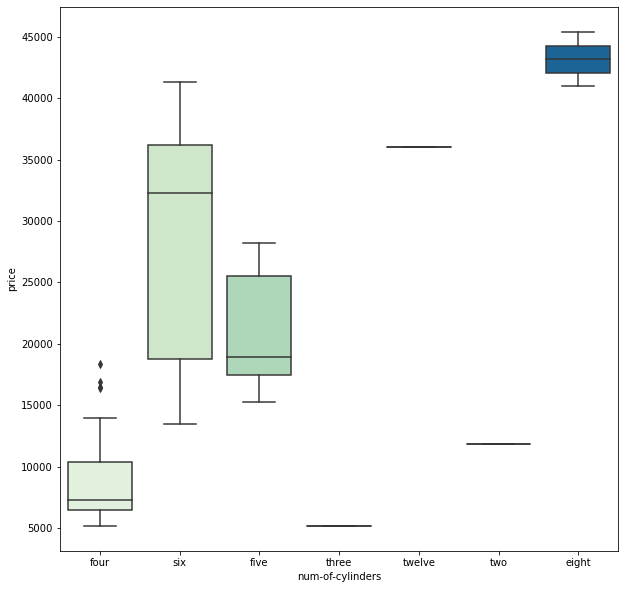

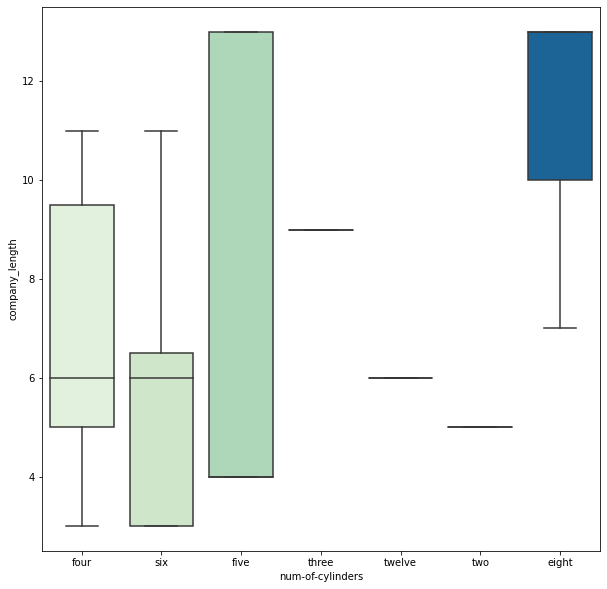

In [49]:
for i in range(0, len(cat_list)):
    cat = cat_list[i]
for j in range(0, len(num_list)):
    num = num_list[j]
    plt.figure (figsize = (10,10))
    sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")
